# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Hendy Sukandi
- **Email:** hensukandi373@gmail.com
- **ID Dicoding:** hendy_sukandi_9gxq

## Menentukan Pertanyaan Bisnis

- Apa faktor-faktor yang paling memengaruhi kualitas udara di Guanyan, dan bagaimana hubungannya dengan tingkat polusi udara?
- Bagaimana pola kualitas udara di Guanyan selama tiap tahun?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Insight:**
- Import library yang diperlukan.

## Data Wrangling

### Gathering Data

In [3]:
df = pd.read_csv("./data/PRSA_Data_Guanyuan_20130301-20170228.csv")

Memuat dataset ke dalam DataFrame menggunakan Pandas.

**Insight:**
- Memuat dataset ke dalam DataFrame menggunakan Pandas.

### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Melihat informasi umum tentang DataFrame, seperti jumlah entri dan tipe data masing-masing kolom.

In [5]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

**Insight:**
- Cek jumlah nilai yang hilang pada setiap kolom.

In [6]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**Insight:**
- Melihat beberapa baris pertama dari dataset untuk mendapatkan gambaran umum tentang data.

In [7]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Memeriksa apakah ada duplikasi dalam dataset.

In [8]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,34983,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,NaN,1.204071,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


**Insight:**
- Menampilkan statistik deskriptif dari data numerik untuk pemahaman lebih lanjut.

### Cleaning Data

In [9]:
mis_values = {
    'PM2.5': df['PM2.5'].median(),
    'PM10': df['PM10'].median(),
    'SO2': df['SO2'].median(),
    'NO2': df['NO2'].median(),
    'CO': df['CO'].median(),
    'O3': df['O3'].median(),
    'TEMP':df['TEMP'].median(),
    'PRES': df['PRES'].median(),
    'DEWP': df['DEWP'].median(),
    'RAIN': df['RAIN'].median(),
    'wd': df['wd'].mode()[0],
    'WSPM': df['WSPM'].median()
}

for column, median_value in mis_values.items():
  df.fillna(median_value, inplace=True)

**Insight:**
- Menggunakan median untuk imputasi missing values pada data numerik
- Menggunakan mode untuk data kategori

In [10]:
df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- Melihat apakah missing value sudah di atasi

In [11]:
outlier_columns = []

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    if (df[column] < lower_bound).any() or (df[column] > upper_bound).any():
        outlier_columns.append(column)

        median_value = df[column].median()
        df[column] = df[column].where(
            (df[column] >= lower_bound) & (df[column] <= upper_bound), 
            median_value
        )

**Insight:**
- Menggunakan metode Interquartile Range (IQR) untuk menemukan outliers dalam dataset.

## Exploratory Data Analysis (EDA)

### Explore 
- Hubungan antar variabel
- Perbedaan antar tahun
- Distribusi masing-masing polutan

In [12]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.0,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.836895,97.299053,11.780529,55.660104,959.304557,48.056643,13.585187,1011.846665,3.123449,0.0,NaN,1.526004,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,56.157336,69.097404,11.602654,30.943024,652.783699,43.463709,11.395871,10.401084,13.685001,0.0,NaN,0.907298,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,59.000000,0.214200,-16.800000,985.900000,-35.300000,0.0,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,41.000000,3.000000,31.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.0,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,9.000000,52.000000,900.000000,44.000000,14.600000,1011.400000,3.800000,0.0,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,138.000000,16.000000,75.000000,1300.000000,70.000000,23.300000,1020.100000,15.600000,0.0,NaN,2.000000,NaN


In [13]:
correlation_matrix = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

**Insight**
- Mengidentifikasi hubungan antar variabel

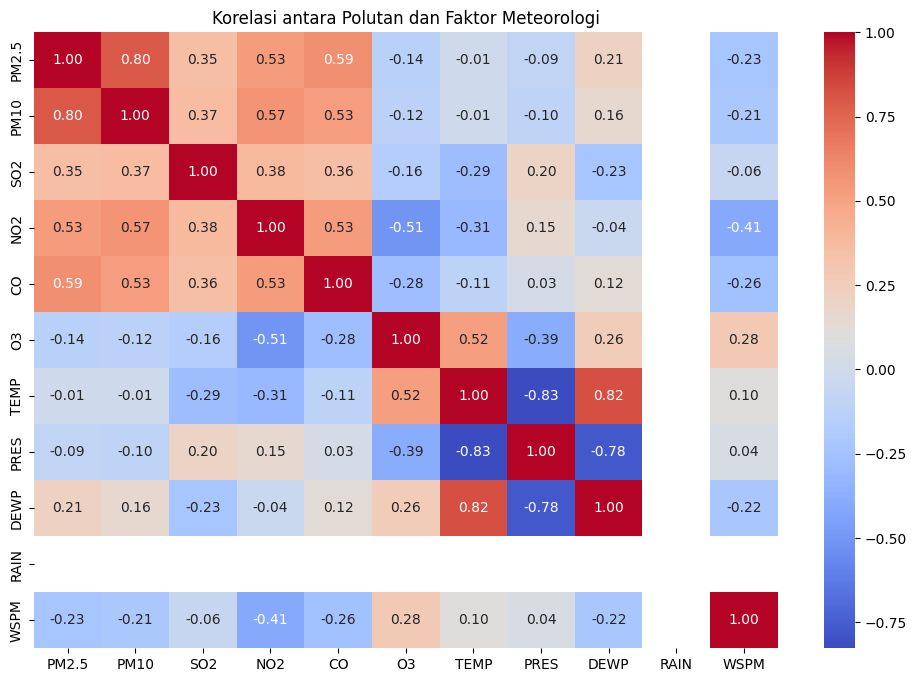

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi antara Polutan dan Faktor Meteorologi')
plt.show()

Memvisualisasikan korelasi antara polutan dan faktor meteorologi

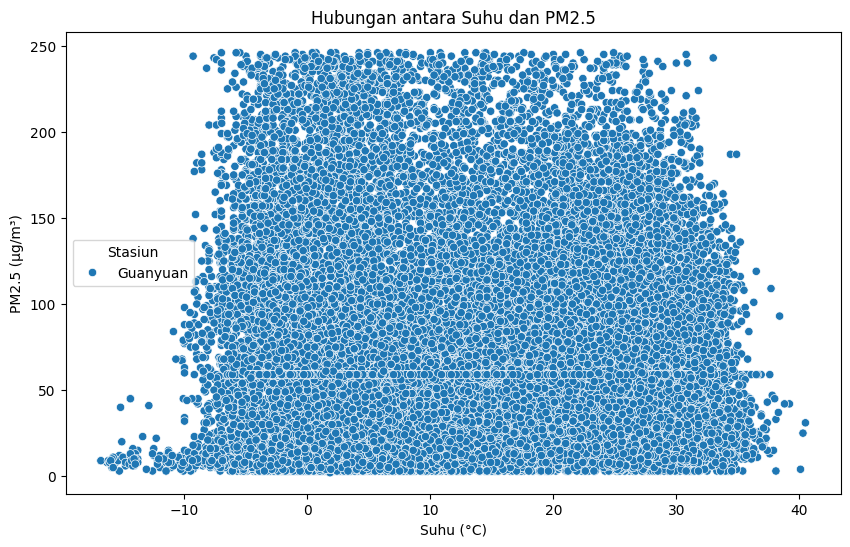

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TEMP', y='PM2.5', hue='station')
plt.title('Hubungan antara Suhu dan PM2.5')
plt.xlabel('Suhu (°C)')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend(title='Stasiun')
plt.show()

Menganalisis dan memvisualisasikan hubungan antara suhu dan kadar PM2.5.

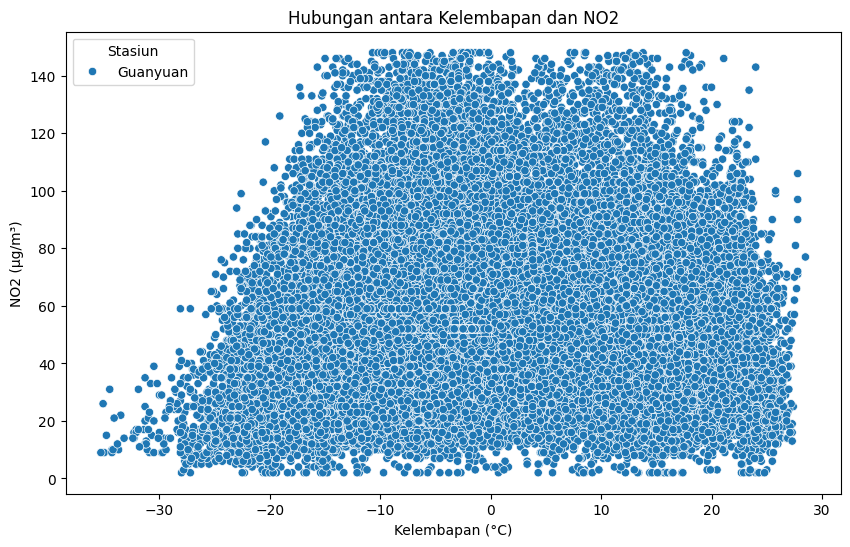

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DEWP', y='NO2', hue='station')
plt.title('Hubungan antara Kelembapan dan NO2')
plt.xlabel('Kelembapan (°C)')
plt.ylabel('NO2 (µg/m³)')
plt.legend(title='Stasiun')
plt.show()

Menganalisis dan memvisualisasikan hubungan antara kelembapan dan kadar NO2

**Insight:**
- Memvisualisasikan hubungan antar variabel.

In [17]:
yearly_stats = df.groupby(by='year').agg({
    'PM2.5': ['mean', 'min', 'max', 'std'],
    'PM10': ['mean', 'min', 'max', 'std'],
    'SO2': ['mean', 'min', 'max', 'std'],
    'NO2': ['mean', 'min', 'max', 'std'],
    'CO': ['mean', 'min', 'max', 'std'],
    'O3': ['mean', 'min', 'max', 'std']
})
print(yearly_stats)

          PM2.5                               PM10                         \
           mean  min    max        std        mean  min    max        std   
year                                                                        
2013  72.878813  3.0  246.0  56.696888  100.977533  2.0  308.0  68.043534   
2014  74.098390  3.0  246.0  56.051181  102.029041  3.0  308.0  68.736865   
2015  67.736872  3.0  246.0  55.212254   94.512626  3.0  308.0  69.810588   
2016  65.830487  3.0  246.0  55.169731   93.471539  3.0  308.0  67.954904   
2017  65.541667  2.0  244.0  62.836529   89.940678  4.0  307.0  76.173046   

            SO2       ...    NO2                      CO                \
           mean  min  ...    max        std         mean   min     max   
year                  ...                                                
2013  13.671986  1.0  ...  148.0  28.748105   886.941721  59.0  3000.0   
2014  12.427660  1.0  ...  148.0  31.297914  1043.854795  59.0  3000.0   
2015  10.4785

Untuk mendapatkan gambaran umum mengenai tren kualitas udara setiap tahun berdasarkan kadar polutan (PM2.5, PM10, SO2, NO2, CO, O3), termasuk nilai rata-rata, minimum, maksimum, dan deviasi standar untuk masing-masing polutan.

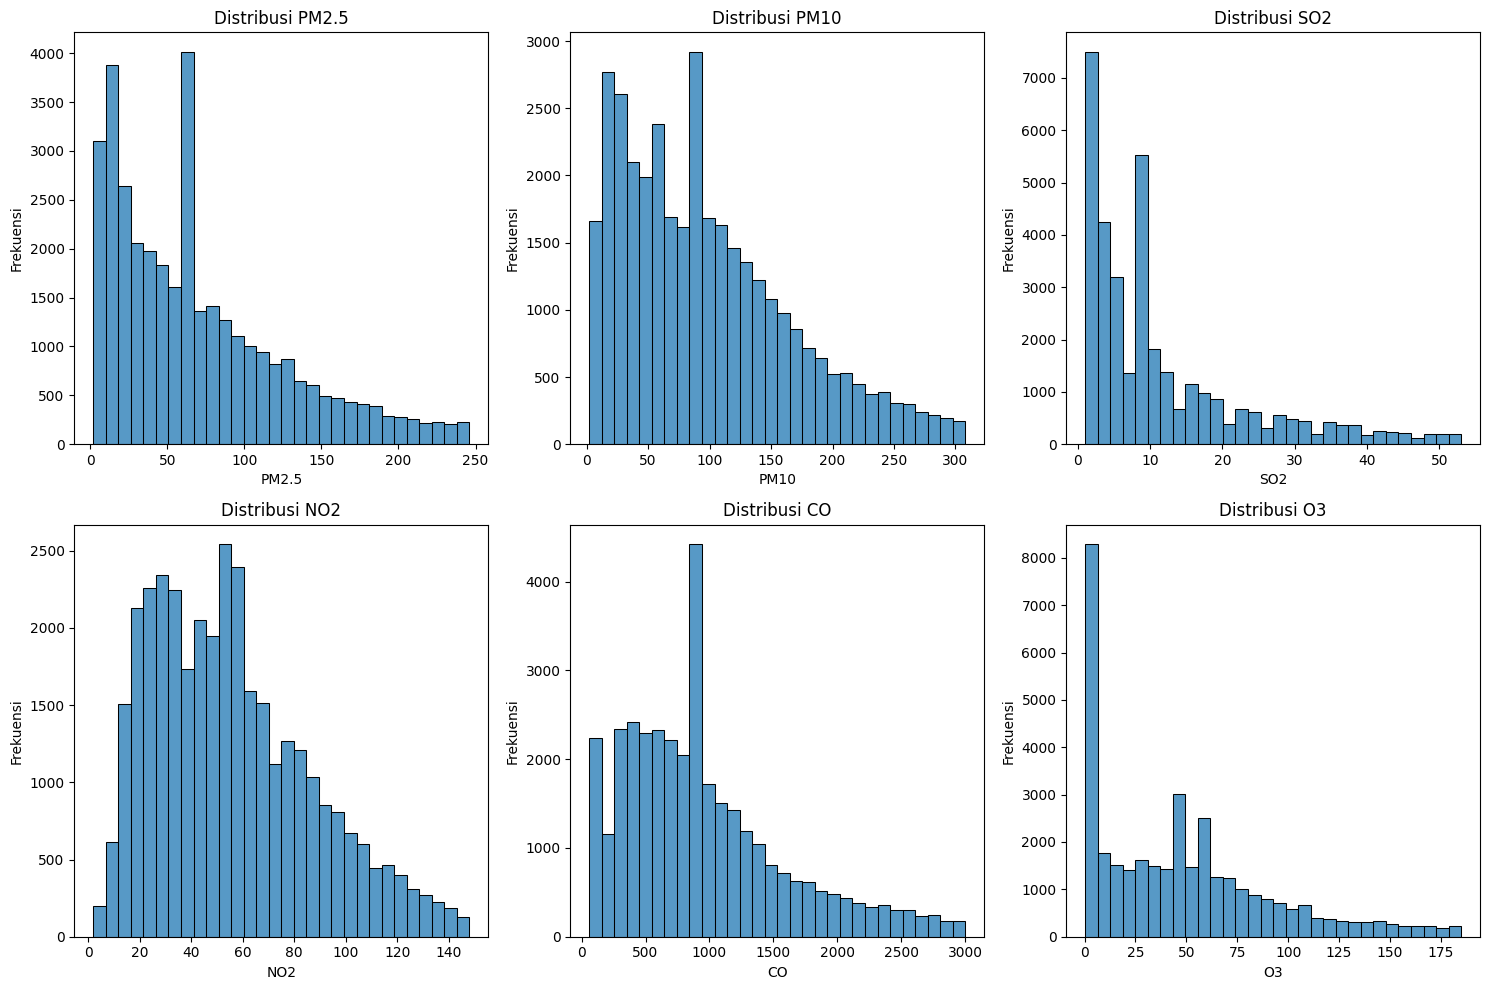

In [18]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=30)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()


Memvisualisasikan distribusi setiap polutan dalam dataset, memberikan wawasan mengenai sebaran dan frekuensi nilai polutan yang diukur.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [19]:
X = df[['TEMP', 'PRES', 'DEWP', 'RAIN']]
y = df['PM2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Koefisien'])
print(coefficients)

      Koefisien
TEMP  -3.164672
PRES  -0.596700
DEWP   2.691736
RAIN   0.000000


**Insight:**
- Untuk melatih model regresi linier yang memprediksi kadar PM2.5 berdasarkan fitur suhu, tekanan, kelembapan, dan curah hujan, serta mengidentifikasi pengaruh relatif dari masing-masing fitur terhadap kadar polutan.

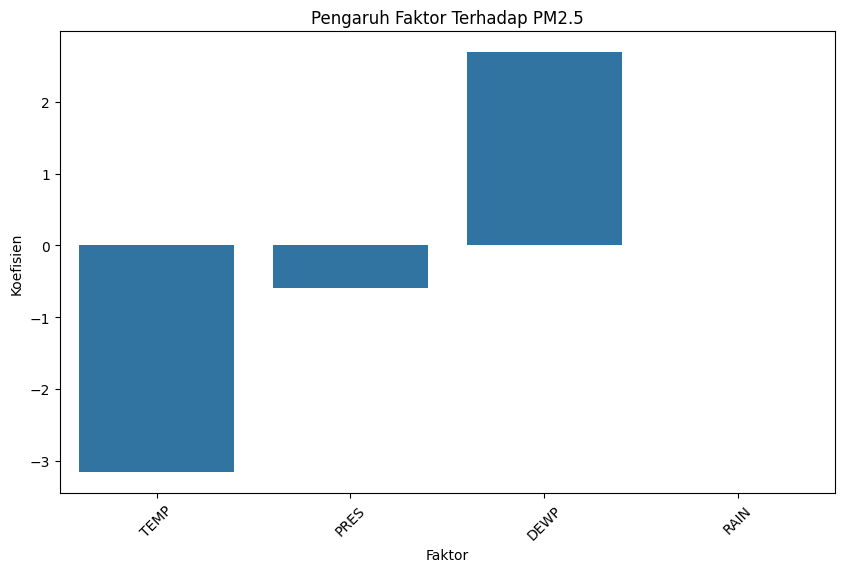

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y='Koefisien', data=coefficients)
plt.title('Pengaruh Faktor Terhadap PM2.5')
plt.xlabel('Faktor')
plt.ylabel('Koefisien')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Memvisualisasikan pengaruh relatif dari setiap faktor (suhu, tekanan, kelembapan, dan curah hujan) terhadap kadar PM2.5 berdasarkan koefisien model regresi linier yang telah dilatih.

**Insight:**
- Faktor yang Paling Berpengaruh: Kelembapan (DEWP) memiliki pengaruh positif yang signifikan terhadap kadar PM2.5, sedangkan suhu (TEMP) dan tekanan (PRES) memiliki pengaruh negatif yang signifikan.
- Curah Hujan (RAIN) tidak berpengaruh terhadap kadar PM2.5 dalam dataset ini.

### Pertanyaan 2:

In [21]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

average_pm25_per_year = df.groupby('year')['PM2.5'].mean().reset_index()
print(average_pm25_per_year)

   year      PM2.5
0  2013  72.878813
1  2014  74.098390
2  2015  67.736872
3  2016  65.830487
4  2017  65.541667


**Insight:**
- Untuk mendapatkan rata-rata kadar PM2.5 per tahun dalam dataset.

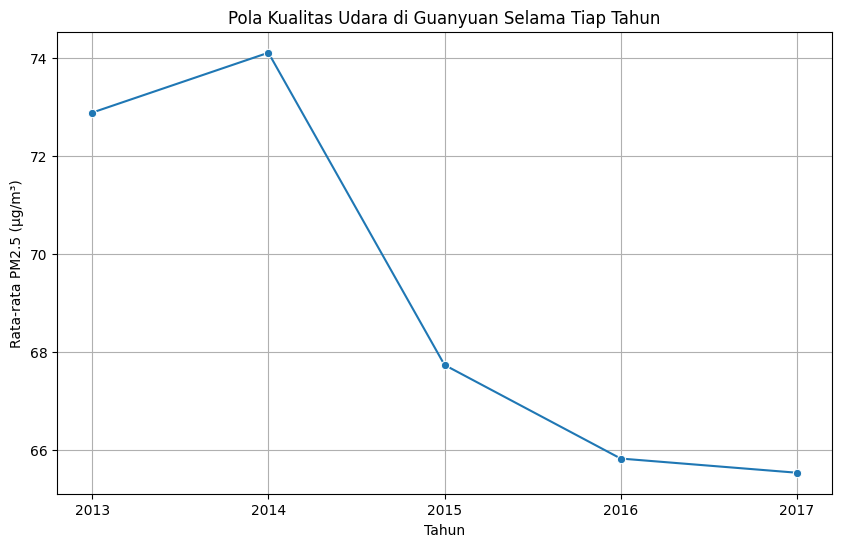

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_pm25_per_year, x='year', y='PM2.5', marker='o')
plt.title('Pola Kualitas Udara di Guanyuan Selama Tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5 (µg/m³)')
plt.xticks(average_pm25_per_year['year'])
plt.grid()
plt.show()

**Insight:**
- Memvisualisasikan tren rata-rata kadar PM2.5 di Guanyuan selama setiap tahun
- Secara keseluruhan, meskipun ada puncak kadar PM2.5 pada tahun 2014, data menunjukkan tren penurunan kadar PM2.5 dari tahun 2015 hingga 2017.

In [23]:
df.to_csv("./dashboard/main_data.csv", index=False)

## Analisis Lanjutan (Opsional)

## Conclusion

- Faktor yang Paling Berpengaruh: Kelembapan (DEWP) memiliki pengaruh positif yang signifikan terhadap kadar PM2.5, sedangkan suhu (TEMP) dan tekanan (PRES) memiliki pengaruh negatif yang signifikan. Curah Hujan (RAIN) tidak berpengaruh terhadap kadar PM2.5 dalam dataset ini.
- Secara keseluruhan, meskipun ada puncak kadar PM2.5 pada tahun 2014, data menunjukkan tren penurunan kadar PM2.5 dari tahun 2015 hingga 2017.